In [22]:
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

#read csv, csv파일 읽기
# url="https://raw.githubusercontent.com/SongJuHo-0410/data_visualization/master/2303.csv"
# df=pd.read_csv(url,encoding='cp949')

df = pd.read_csv(r"2303.csv", encoding="cp949")


C:\Users\sojh0\AppData\Local\Temp\ipykernel_10952\4191343573.py:14: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"2303.csv", encoding="cp949")


In [23]:
# fname 옵션을 사용하는 방법
path = 'C:\\WINDOWS\\Fonts\\NanumBarunpenR.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunpen


In [24]:
df.head(1)

,목록키,목록유형,목록명,목록설명,조회수,분류체계,기관코드,기관명,국가중점여부,표준데이터여부,목록 등록일,목록 수정일,목록 URL,다운로드_활용건수,키워드
0,15108268,FILE,한국전력거래소_월별 시간별 제주 태양광 풍력 제어량 및 제어 횟수,2015년~2022년 11월까지의 월별 시간별 제주 태양광·풍력 제어량 및 제어횟수...,289,산업고용,B552115,한국전력거래소,N,N,2022-11-22,2023-04-03,https://www.data.go.kr/data/15108268/fileData.do,147,"제주,재생에너지,제어량"


In [25]:
# '목록등록일'을 날짜 형식으로 변환
df['목록 등록일'] = pd.to_datetime(df['목록 등록일'])

# '목록등록일'의 년도 추출
df['년도'] = df['목록 등록일'].dt.year

In [26]:
df['분류체계'].value_counts()

공공행정      9196
문화관광      8676
산업고용      6442
교통물류      5661
환경기상      5389
재정금융      4567
농축수산      4403
국토관리      4284
사회복지      4092
재난안전      3625
보건의료      3621
교육        3619
과학기술      1907
식품건강      1867
통일외교안보    1046
법률         439
Name: 분류체계, dtype: int64

In [27]:
df.groupby('분류체계')['기관명'].value_counts()

분류체계  기관명          
공공행정  행정안전부            519
      서울특별시            484
      한국부동산원           370
      조달청              186
      공무원연금공단          164
                      ... 
환경기상  한국조폐공사             1
      함안지방공사             1
      해양수산부 국립수산과학원      1
      환경부 대구지방환경청        1
      환경부 영산강유역환경청       1
Name: 기관명, Length: 4545, dtype: int64

In [28]:
# '공공행정' 값을 가지는 행 필터링
filtered_df = df[df['분류체계'] == '환경기상']

# 필터링된 데이터프레임에서 기관명 값별 개수 파악
value_counts = filtered_df['기관명'].value_counts()

value_counts.head(20)

국립공원공단         321
서울특별시          221
한국환경공단         194
한국환경산업기술원      163
해양환경공단         126
환경부            116
충청남도           110
한국수자원공사        109
한국환경연구원         99
경기도             91
환경부 국립환경과학원     89
제주특별자치도         88
대전광역시           88
국립생태원           87
경상남도            77
인천광역시           69
서울특별시 서대문구      62
충청북도            55
경기도 광명시         53
전라북도            49
Name: 기관명, dtype: int64

In [29]:
# 각 분류체계별 기관명 개수 계산
counts = df.groupby('분류체계')['기관명'].value_counts().rename('개수').reset_index()

# 각 분류체계별로 상위 5개씩 추출
top_counts = counts.groupby('분류체계').apply(lambda x: x.nlargest(5, '개수')).reset_index(drop=True)

print(top_counts)

    분류체계        기관명   개수
0   공공행정      행정안전부  519
1   공공행정      서울특별시  484
2   공공행정     한국부동산원  370
3   공공행정        조달청  186
4   공공행정    공무원연금공단  164
..   ...        ...  ...
75  환경기상     국립공원공단  321
76  환경기상      서울특별시  221
77  환경기상     한국환경공단  194
78  환경기상  한국환경산업기술원  163
79  환경기상     해양환경공단  126

[80 rows x 3 columns]


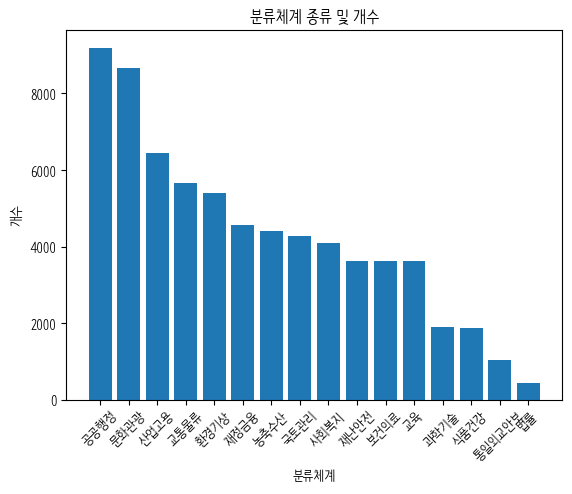

In [30]:
# 분류체계 종류와 개수를 저장한 변수
categories = df['분류체계'].value_counts()

# 그래프 생성
plt.bar(categories.index, categories.values)

plt.title('분류체계 종류 및 개수')
plt.ylabel('개수')
plt.xlabel('분류체계')

# x축 레이블 기울이기
plt.xticks(rotation=45)

plt.show()

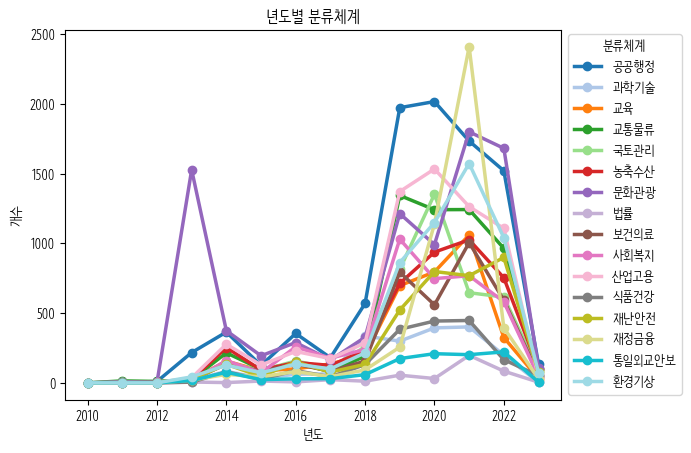

In [31]:
# 년도별 분류체계 개수 계산
categories_by_year = df.groupby(['년도', '분류체계']).size().unstack(fill_value=0)

# 선 그래프 색상 맵 지정
color_map = 'tab20'

# 선 두께 설정
line_width = 2.5

# 선 그래프 생성
categories_by_year.plot(kind='line', marker='o', colormap=color_map, linewidth=line_width)

plt.title('년도별 분류체계')
plt.ylabel('개수')
plt.xlabel('년도')
plt.legend(title='분류체계', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

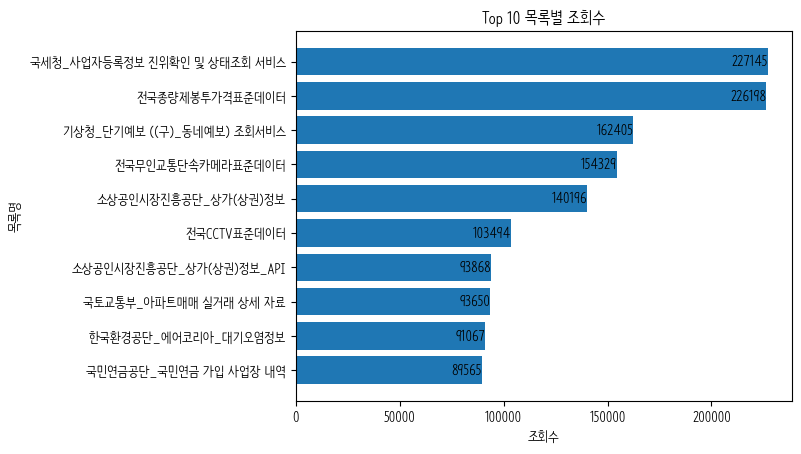

In [37]:
# Replace "(NULL)" with 0 in '조회수' column
df['조회수'] = df['조회수'].replace('(NULL)', 0)

# Convert '조회수' column to numeric type
df['조회수'] = pd.to_numeric(df['조회수'], errors='coerce')

# 조회수를 기준으로 내림차순 정렬
sorted_data = df.sort_values(by='조회수', ascending=False)

# 상위 10개 데이터 추출
top_10 = sorted_data.head(10)

# x축과 y축 데이터 추출
x = top_10['조회수']
y = top_10['목록명']

# 그래프 그리기 (수평 막대 그래프)
plt.barh(y, x)
plt.xlabel('조회수')
plt.ylabel('목록명')
plt.title('Top 10 목록별 조회수')

# 조회수 표시
for i, value in enumerate(x):
    plt.text(value, i, str(value), ha='right', va='center')

plt.gca().invert_yaxis()  # y축 순서 뒤집기
plt.show()

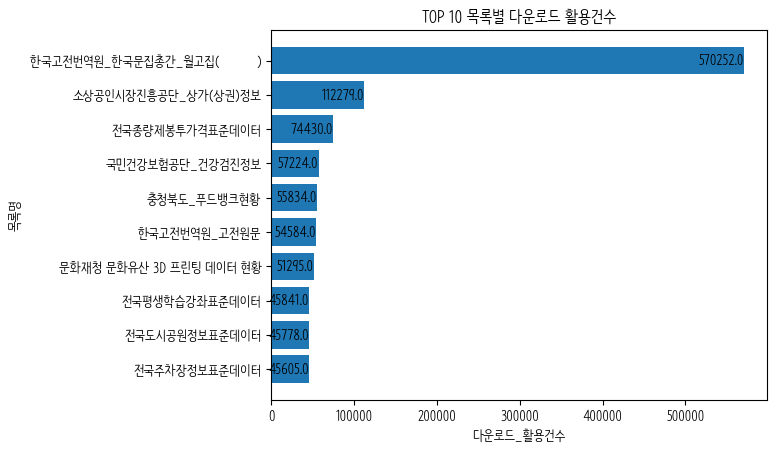

In [52]:
# '-' 값을 NaN으로 처리
df['다운로드_활용건수'] = pd.to_numeric(df['다운로드_활용건수'], errors='coerce')

# NaN이 포함된 행 제거
df = df.dropna(subset=['다운로드_활용건수'])

# 상위 10개 데이터 추출 및 정렬
상위_10개_데이터 = df.nlargest(10, '다운로드_활용건수')

# 그래프 그리기 (수평 막대 그래프)
plt.barh(상위_10개_데이터['목록명'], 상위_10개_데이터['다운로드_활용건수'])
plt.xlabel('다운로드_활용건수')
plt.ylabel('목록명')
plt.title('TOP 10 목록별 다운로드 활용건수')

# 다운로드_활용건수 표시
for i, value in enumerate(상위_10개_데이터['다운로드_활용건수']):
    plt.text(value, i, str(value), ha='right', va='center')

plt.gca().invert_yaxis()  # y축 순서 뒤집기
plt.show()


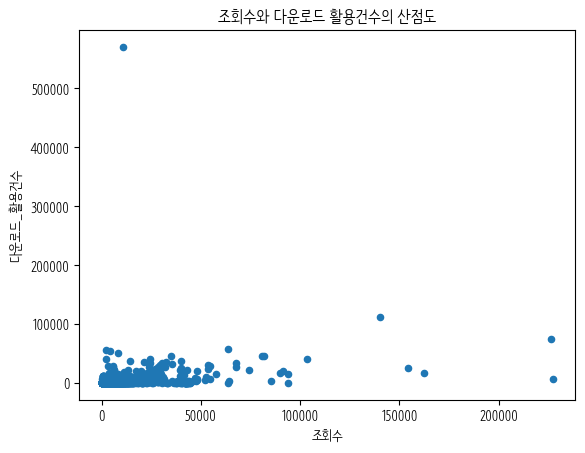

In [68]:
# 그래프 그리기
plt.scatter(df['조회수'], df['다운로드_활용건수'],s=20)
plt.xlabel('조회수')
plt.ylabel('다운로드_활용건수')
plt.title('조회수와 다운로드 활용건수의 산점도')
plt.show()

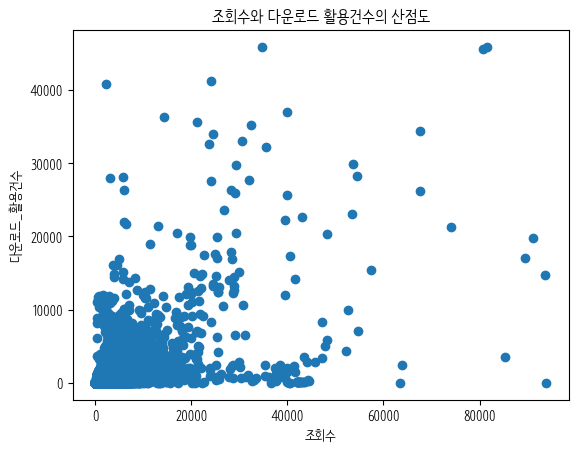

In [62]:
# 다운로드_활용건수가 5만 미만인 데이터 필터링
filtered_df = df[df['다운로드_활용건수'] < 50000]

# 조회수가 10만 미만인 데이터 필터링
filtered_df = filtered_df[filtered_df['조회수'] < 100000]

# 그래프 그리기
plt.scatter(filtered_df['조회수'], filtered_df['다운로드_활용건수'])
plt.xlabel('조회수')
plt.ylabel('다운로드_활용건수')
plt.title('조회수와 다운로드 활용건수의 산점도')
plt.show()

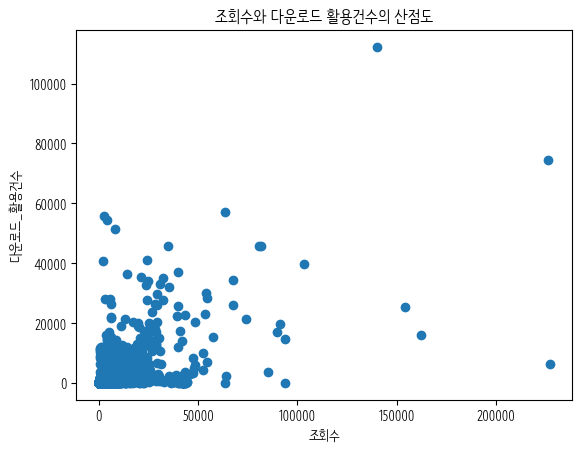

In [69]:
# 다운로드_활용건수가 5만 미만인 데이터 필터링
filtered_df = df[df['다운로드_활용건수'] < 150000]

# 조회수가 10만 미만인 데이터 필터링
filtered_df = filtered_df[filtered_df['조회수'] <300000]

# 그래프 그리기
plt.scatter(filtered_df['조회수'], filtered_df['다운로드_활용건수'])
plt.xlabel('조회수')
plt.ylabel('다운로드_활용건수')
plt.title('조회수와 다운로드 활용건수의 산점도')
plt.show()